<p><a href="https://www.asu.edu.eg/"><img align="right" src="https://scontent.fcai22-1.fna.fbcdn.net/v/t39.30808-6/319422102_552367060236263_7422300774427078391_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=09cbfe&_nc_ohc=zwABgo9bkI4AX8005Ad&_nc_ht=scontent.fcai22-1.fna&oh=00_AfCGVrthCNGu0oIHW_rcZaZFjs-LQFm2WeXUZIlMsYziBg&oe=64EBB00D" width="220" /></a></p>
<div style="font-family:Georgia;color:black;font-size:120%;text-align:left;">
<h1 style="color: blue";>
  English Sign Language Alphabet Classification
</h1>
<h3>
    The First Notebook <br> Random Forrest Model
</h3>
    <h6>
        The final project of the computer vision summer training held by ApplAI
    </h6>
    <h6>
        &copy; 2023 <a href="https://aliabdallah7.github.io/My-Portfolio/" style="color: #00abf0;">Ali Abdallah</a>
    </h6>
    <br>
<br>
</div>

<p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:150%;text-align:center;border-radius:20px 40px;">Table Of Contents</p>   
    
* [1. Importing Modules](#1)
    
* [2. Initialize MediaPipe Hands](#2)
    
* [3. Initialize Data Lists](#3) 

* [4. Data Collection and Preprocessing](#4) 
      
* [5. Serialize and Save Data using Pickle](#5)

* [6. Preparing the data for training](#6)

* [7. Pad Sequences](#7)

* [8. Save the Trained Model using Pickle](#8)

* [9. Visualize the Model Performance](#9)


<a id="1"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Importing Modules</p>

In [34]:
import os  # Import the 'os' module for file and directory operations
import pickle  # Import 'pickle' for data serialization and deserialization
import mediapipe as mp  # Import the 'mediapipe' library for hand tracking
import cv2  # Import OpenCV for image manipulation
import numpy as np  # Import 'numpy' for numerical operations
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for machine learning
from sklearn.model_selection import train_test_split  # Import train_test_split for data splitting
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Import accuracy_score for evaluating model performance
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import pad_sequences for sequence padding
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Define constants
DATA_DIR = './data/train'  # Set the directory containing training data

<a id="2"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Initialize MediaPipe Hands</p>

In this section of code, we are initializing the MediaPipe Hands library, which is a part of the `mediapipe` package. This library allows us to detect and work with hand landmarks in images and videos.

### Import Necessary Modules

We first import the necessary modules from MediaPipe:
- `mp.solutions.hands`: This module provides the functionality for hand detection and landmark estimation.
- `mp.solutions.drawing_utils`: This module contains utility functions for drawing landmarks on images.
- `mp.solutions.drawing_styles`: Here, we import styles that can be used for drawing landmarks.

### Create a Hands Detection Model

Next, we create an instance of the hands detection model using `mp_hands.Hands()`. This model will be responsible for detecting hands and estimating landmarks in images or video frames.

- `static_image_mode=True`: We set this parameter to `True`, indicating that we want to use the model for static image analysis (i.e., processing individual frames as static images).
- `min_detection_confidence=0.3`: This parameter sets the minimum confidence score (ranging from 0 to 1) required for a hand to be detected. Hands with confidence scores below this threshold will not be considered.

By initializing this model, we are now ready to use it to detect and work with hand landmarks in our images or video frames.


In [4]:
# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands  # Create an instance of the hands module from mediapipe
mp_drawing = mp.solutions.drawing_utils  # Utility functions for drawing landmarks on images
mp_drawing_styles = mp.solutions.drawing_styles  # Styles for drawing landmarks

# Create a hands detection model
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

<a id="3"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Initialize Data Lists</p>

In this section of the code, we are initializing two empty lists: `data` and `labels`. These lists will be used to store hand landmark data and corresponding labels (directory names), respectively.

### `data` List

- `data = []`: We create an empty list named `data`. This list will be used to hold the hand landmark data extracted from images or video frames. Each element in this list will represent the landmark coordinates of a detected hand.

### `labels` List

- `labels = []`: Another empty list named `labels` is created. This list will be used to store labels associated with the data. In the context of this code, the labels typically correspond to the directory names from which the images were loaded. These labels help in associating the hand landmark data with their respective sign language gestures or classes.

By initializing these two lists, we prepare our code to collect and organize the hand landmark data and their corresponding labels during the data preprocessing phase. These lists will later be used for training and evaluation of the sign language detection model.

In [5]:
# Initialize data lists
data = []  # Create an empty list to store hand landmark data
labels = []  # Create an empty list to store labels (directory names)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<a id="4"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Data Collection and Preprocessing</p>

In this section of the code, we are collecting and preprocessing hand landmark data from a set of images organized into directories. This data collection and preprocessing is an essential step in training a sign language detection model.

### Loop Through Directories and Image Files

- `for dir_ in os.listdir(DATA_DIR)`: We loop through the directories within the specified `DATA_DIR` directory. Each directory typically corresponds to a specific sign language gesture or class.

- `for img_path in os.listdir(os.path.join(DATA_DIR, dir_))`: Within each directory, we further loop through the image files. These image files contain hand gestures that we want to detect and classify.

### Initialize Data Containers

- `data_aux = []`: We create an empty list `data_aux` to temporarily store the landmark data for a single image. This list will be populated with relative coordinates of hand landmarks for each image.

- `x_ = []` and `y_ = []`: Two empty lists `x_` and `y_` are created to store the x and y coordinates of hand landmarks as they are detected.

### Process Each Image

For each image in the loop:
- We read the image using OpenCV (`cv2.imread`) and convert it to the RGB color space to ensure compatibility with the MediaPipe model.

- We use the MediaPipe Hands model (`hands.process`) to detect hand landmarks in the image.

- If hand landmarks are detected (`if results.multi_hand_landmarks:`), we proceed to extract and preprocess the landmark data.

### Extract and Preprocess Landmark Data

- We loop through each detected hand landmark and retrieve its x and y coordinates. These coordinates are stored in `x_` and `y_` lists.

- We calculate the relative coordinates of the landmarks by subtracting the minimum x and y values in `x_` and `y_` from each landmark's x and y coordinates, respectively. This helps normalize the landmark data.

- The normalized landmark data (`data_aux`) is then appended to the `data` list, and the corresponding label (directory name) is appended to the `labels` list. This associates each set of landmarks with its respective sign language gesture or class.

By executing this code, we collect and preprocess the hand landmark data, making it suitable for training a sign language detection model.


In [6]:
# Loop through the directories in the data directory
for dir_ in os.listdir(DATA_DIR):
    # Loop through image files in each directory
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []  # Create an empty list to store landmark data for a single image
        x_ = []  # Create empty lists to store x-coordinates of landmarks
        y_ = []  # Create empty lists to store y-coordinates of landmarks
        
        # Read the image
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        
        # Convert the image to RGB color space
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Process the image to detect hand landmarks
        results = hands.process(img_rgb)
        
        # Check if hand landmarks are detected
        if results.multi_hand_landmarks:
            # Loop through detected hand landmarks
            for hand_landmarks in results.multi_hand_landmarks:
                # Loop through all landmarks
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x  # Get x-coordinate of the landmark
                    y = hand_landmarks.landmark[i].y  # Get y-coordinate of the landmark
                    x_.append(x)  # Append x-coordinate to the list
                    y_.append(y)  # Append y-coordinate to the list
                
                # Calculate the relative coordinates of landmarks
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))  # Calculate relative x-coordinate
                    data_aux.append(y - min(y_))  # Calculate relative y-coordinate
            
            # Append the landmark data and corresponding label to the data and labels lists
            data.append(data_aux)
            labels.append(dir_)

<a id="5"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Serialize and Save Data using Pickle</p>

In this section of the code, we are serializing and saving the collected hand landmark data and their corresponding labels to a binary file using the Python `pickle` module. This is a common technique for saving data in a format that can be easily loaded and used for later tasks, such as model training.

### Open a Binary File

- `f = open('data.pickle', 'wb')`: We open a binary file named `'data.pickle'` in write-binary mode (`'wb'`). This file will be used to store our serialized data and labels.

### Serialize and Save Data

- `pickle.dump({'data': data, 'labels': labels}, f)`: We use the `pickle.dump()` function to serialize and save a Python dictionary containing our data and labels. The dictionary has two key-value pairs: `'data'` containing the hand landmark data and `'labels'` containing the corresponding labels (directory names).

### Close the File

- `f.close()`: Finally, we close the binary file. It's important to close the file after writing to ensure that all data is properly flushed and saved.

By executing this code, we store the collected data and labels in a serialized format within the `'data.pickle'` file. This serialized data can be easily loaded and used for training machine learning models or other data analysis tasks in the future.


In [7]:
# Open a binary file to save the data and labels using pickle
f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)  # Serialize and save data and labels
f.close()  # Close the file

<a id="6"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Preparing the data for training</p>

In [8]:
# Load the previously saved data from the 'data.pickle' file
data_dict = pickle.load(open('./data.pickle', 'rb'))

In this section of the code, we retrieve the hand landmark data and labels from a Python dictionary named `data_dict`. The dictionary is expected to contain these two key-value pairs:

- `'data'`: This key corresponds to the hand landmark data collected from images or video frames.
- `'labels'`: This key corresponds to the labels associated with the data, typically representing sign language gestures or classes.

### Retrieve Data and Labels

- `data = data_dict.get('data', [])`: We use the `.get()` method to retrieve the value associated with the key `'data'` from the `data_dict` dictionary. If the key is found in the dictionary, its corresponding value (the hand landmark data) is assigned to the variable `data`. If the key is not found (or if it's associated with a `None` value), the default value `[]` (an empty list) is assigned to `data`. This is a safeguard to ensure that `data` always contains a list.

- `labels = data_dict.get('labels', [])`: Similarly, we retrieve the labels from the dictionary using `.get()`. The value associated with the key `'labels'` is assigned to the variable `labels`. If the key is not found or associated with `None`, an empty list `[]` is assigned to `labels`.

### Purpose

This code allows us to gracefully handle cases where the `data_dict` dictionary may not contain the expected keys or where the values associated with those keys are missing or `None`. By assigning default values of empty lists, we ensure that our code can proceed without errors, even if the data or labels are absent.

These retrieved `data` and `labels` variables can then be used for further processing or analysis.


In [9]:
data = data_dict.get('data', [])
labels = data_dict.get('labels', [])

# Pad Sequences


In this section of the code, we are applying padding to sequences stored in the `data` list. Padding is a common technique used in sequence data processing, often applied to ensure that all sequences have the same length. This is useful for training models that require fixed-length input sequences, such as neural networks.

### Code Explanation

- `data_padded = pad_sequences(data, maxlen=100, padding='post', truncating='post', dtype='float32')`: Here, we use the `pad_sequences` function, likely from a library like Keras or TensorFlow, to pad the sequences stored in the `data` list.

  - `data`: The `data` variable contains a list of sequences that we want to pad.
  - `maxlen=100`: We specify the maximum length we want each sequence to have after padding. In this case, we set it to 100, meaning that all sequences will have a length of 100 after padding.
  - `padding='post'`: We specify that padding should be added at the end of each sequence. This means that if a sequence is shorter than 100 elements, padding will be added to the end of the sequence to make it 100 elements long.
  - `truncating='post'`: If a sequence is longer than 100 elements, we specify that it should be truncated from the end to fit the specified maximum length of 100.
  - `dtype='float32'`: We specify the data type of the elements in the padded sequences as float32.

### Purpose

The purpose of this code is to ensure that all sequences in the `data` list have a consistent length of 100 elements, which is often necessary when working with sequences in machine learning models. Sequences that are shorter than 100 elements are padded with zeros at the end, and sequences that are longer are truncated to fit the desired length.

By applying this padding, you create a uniform input format that can be fed into a machine learning model for further processing or training.


In [10]:
data_padded = pad_sequences(data, maxlen=100, padding='post', truncating='post', dtype='float32')

# Data Conversion and Splitting

In this section of the code, we perform two important data processing steps: converting the padded data to a NumPy array and splitting the data into training and testing sets. These steps are essential for preparing the data for machine learning model training and evaluation.

### Convert Padded Data to a NumPy Array

- `data_array = np.array(data_padded)`: Here, we convert the `data_padded` variable, which contains sequences of padded hand landmark data, into a NumPy array. NumPy arrays are commonly used for numerical data manipulation and are suitable for feeding into machine learning models.

### Split Data into Training and Testing Sets

- `x_train, x_test, y_train, y_test = train_test_split(data_array, labels, test_size=0.2, shuffle=True, stratify=labels)`: This line of code uses the `train_test_split` function, likely from a library like scikit-learn, to split the data into training and testing sets.

  - `data_array`: The NumPy array containing the padded hand landmark data.
  - `labels`: The corresponding labels associated with the data.
  - `test_size=0.2`: We specify that 20% of the data should be allocated to the testing set, while the remaining 80% will be used for training.
  - `shuffle=True`: This parameter ensures that the data is randomly shuffled before splitting, which can help prevent any inherent order or bias in the data from affecting the model's performance.
  - `stratify=labels`: By setting `stratify` to the `labels` variable, we ensure that the class distribution in the training and testing sets is similar to the original data. This is especially important when dealing with imbalanced datasets.

### Purpose

The purpose of these data processing steps is to prepare the data for machine learning model training and evaluation. Converting the padded data to a NumPy array makes it compatible with machine learning libraries, and splitting the data into training and testing sets allows us to assess the model's performance on unseen data. The training set will be used to train the model, while the testing set will be used for evaluation and validation.


In [11]:
# Convert the padded data to a NumPy array
data_array = np.array(data_padded)

# Split the data into training and testing sets using 'train_test_split'
x_train, x_test, y_train, y_test = train_test_split(data_array, labels, test_size=0.2, shuffle=True, stratify=labels)

<a id="7"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Random Forest Classifier Model Training and Evaluation</p>

In this section of the code, we perform the training and evaluation of a Random Forest Classifier model using the prepared training and testing data. The goal is to build a model that can classify sign language gestures based on the hand landmark data.

### Initialize a Random Forest Classifier Model

- `model = RandomForestClassifier()`: Here, we initialize a Random Forest Classifier model. The Random Forest is an ensemble machine learning algorithm that can be used for both classification and regression tasks.

### Train the Model on the Training Data

- `model.fit(x_train, y_train)`: We use the `fit` method to train the Random Forest Classifier on the training data. `x_train` contains the input features (hand landmark data), and `y_train` contains the corresponding labels (sign language gestures).

### Make Predictions on the Testing Data

- `y_predict = model.predict(x_test)`: After training, we use the trained model to make predictions on the testing data (`x_test`). The variable `y_predict` now contains the predicted labels for the testing data.

### Calculate the Accuracy Score

- `score = accuracy_score(y_predict, y_test)`: We calculate the accuracy score of the model's predictions by comparing the predicted labels (`y_predict`) to the actual labels from the testing data (`y_test`). The `accuracy_score` function is commonly used for classification tasks and measures the proportion of correctly classified samples.

### Print the Accuracy Score

- `print('{}% of samples were classified correctly !'.format(score * 100))`: Finally, we print the accuracy score as a percentage. This score indicates the percentage of correctly classified samples in the testing data. A higher accuracy score indicates better model performance.

### Purpose

The purpose of this code section is to train a Random Forest Classifier model using the training data, make predictions on the testing data, and evaluate the model's performance by calculating its accuracy. The accuracy score gives us an understanding of how well the model can classify sign language gestures based on the hand landmark data.

This evaluation provides valuable insights into the model's effectiveness and its ability to generalize to new, unseen data.

In [12]:
# Initialize a Random Forest Classifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_predict = model.predict(x_test)

# Calculate the accuracy score of the model's predictions
score = accuracy_score(y_predict, y_test)

# Print the accuracy score as a percentage
print('{}% of samples were classified correctly !'.format(score * 100))

99.02592537089765% of samples were classified correctly !


<a id="8"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Save the Trained Model using Pickle</p>

In this section of the code, we save the trained Random Forest Classifier model to a binary file using the Python `pickle` module. This step is important for preserving the trained model so that it can be used later for making predictions without the need to retrain it.

### Open a Binary File

- `f = open('model.p', 'wb')`: We open a binary file named `'model.p'` in write-binary mode (`'wb'`). This file will be used to store our serialized model.

### Serialize and Save the Model

- `pickle.dump({'model': model}, f)`: Here, we use the `pickle.dump()` function to serialize and save the trained Random Forest Classifier model. We store it as a dictionary with a single key `'model'` and its corresponding value being the trained model itself (`model`).

### Close the File

- `f.close()`: Finally, we close the binary file. It's important to close the file after writing to ensure that all model data is properly flushed and saved.

### Purpose

The purpose of this code section is to save the trained machine learning model to a file for future use. By serializing the model, we can easily load it back into memory without the need to retrain it. This is particularly valuable when you want to deploy the model in other applications or environments, such as web applications or mobile apps, for real-time predictions on new data.

By saving the model in this way, you ensure that your trained model can be reused efficiently and effectively.

In [13]:
# Save the trained model to a binary file using 'pickle'
f = open('model.p', 'wb')
pickle.dump({'model': model}, f)  # Serialize and save the model
f.close()  # Close the file

<a id="9"></a>

# <p style="background-color:blue;font-family:Georgia;color:#ffffff;font-size:100%;text-align:center;border-radius:20px 40px;">Visualize the Model Performance</p>

In this section of the code, we visualize the performance of the trained Random Forest Classifier model using two common techniques: a confusion matrix and a classification report.

### Confusion Matrix Visualization

- `cm = confusion_matrix(y_test, y_predict)`: We calculate the confusion matrix by comparing the true labels (`y_test`) from the testing data to the predicted labels (`y_predict`) generated by the trained model. The confusion matrix provides a detailed view of the model's performance by showing the number of correct and incorrect predictions for each class.

- `plt.figure(figsize=(8, 6))`: We create a figure to control the size of the heatmap visualization.

- `sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")`: We use the Seaborn library (`sns`) to create a heatmap visualization of the confusion matrix. The heatmap is annotated with the count of predictions in each cell and uses a blue color map (`cmap="Blues"`) for visualization.

- `plt.xlabel('Predicted Labels')` and `plt.ylabel('True Labels')`: We label the x-axis and y-axis of the heatmap to indicate the true labels and predicted labels, respectively.

- `plt.title('Confusion Matrix')`: We set the title of the heatmap as "Confusion Matrix."

- `plt.show()`: Finally, we display the confusion matrix heatmap.

### Classification Report Visualization

- `report = classification_report(y_test, y_predict)`: We generate a classification report by comparing the true labels (`y_test`) to the predicted labels (`y_predict`) from the model. The classification report provides key performance metrics, such as precision, recall, F1-score, and support, for each class.

- `print("Classification Report:\n", report)`: We print the classification report to the console to provide a summary of the model's performance for each class.

### Purpose

The purpose of visualizing the confusion matrix and classification report is to gain insights into the model's performance on a per-class basis. These visualizations help assess how well the model is doing in terms of correctly classifying sign language gestures and provide a deeper understanding of where the model may excel or struggle.

The confusion matrix helps identify patterns of misclassification, while the classification report provides a comprehensive summary of key metrics for each class, allowing for a more detailed evaluation of the model's strengths and weaknesses.

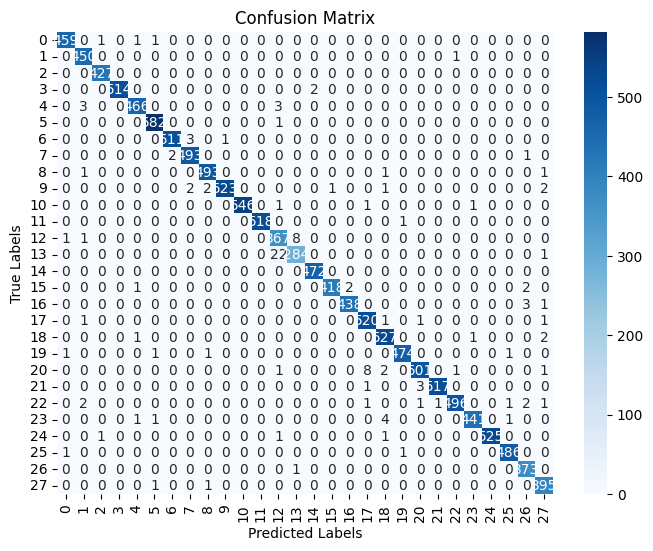

Classification Report:
               precision    recall  f1-score   support

           A       0.99      0.99      0.99       462
           B       0.98      1.00      0.99       451
           C       1.00      1.00      1.00       427
           D       1.00      1.00      1.00       516
           E       0.99      0.99      0.99       472
           F       0.99      1.00      1.00       583
           G       1.00      0.99      0.99       515
           H       0.99      0.99      0.99       496
           I       0.99      0.99      0.99       496
           J       1.00      0.98      0.99       531
           K       1.00      0.99      1.00       549
           L       1.00      1.00      1.00       519
           M       0.93      0.97      0.95       377
           N       0.97      0.93      0.95       307
           O       1.00      1.00      1.00       472
           P       1.00      0.99      0.99       423
           Q       1.00      0.99      0.99       442
   

In [35]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualize the classification report
report = classification_report(y_test, y_predict)
print("Classification Report:\n", report)